In [48]:
#Project_1 Team 3

#Step 1: Import necessary components.
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import scipy.stats as st
from scipy import stats

#Step 2: Importing the data. 
data_file = pd.read_csv('../Resources/NFWBS_PUF_2016_data.csv')
data_file.head()


,PUF_ID,sample,fpl,SWB_1,SWB_2,SWB_3,FWBscore,FWB1_1,FWB1_2,FWB1_3,...,PPMSACAT,PPREG4,PPREG9,PPT01,PPT25,PPT612,PPT1317,PPT18OV,PCTLT200FPL,finalwt
0,10350,2,3,5,5,6,55,3,3,3,...,1,4,8,0,0,0,0,1,0,0.367292
1,7740,1,3,6,6,6,51,2,2,3,...,1,2,3,0,0,0,0,2,0,1.327561
2,13699,1,3,4,3,4,49,3,3,3,...,1,4,9,0,0,0,1,2,1,0.835156
3,7267,1,3,6,6,6,49,3,3,3,...,1,3,7,0,0,0,0,1,0,1.410871
4,7375,1,3,4,4,4,49,3,3,3,...,1,2,4,0,0,1,0,4,1,4.260668


In [49]:
#Step 3: Use the shape function to see how many columns and rows there are.
data_file.shape

(6394, 217)

In [50]:
#Step 4: Find the column names.
data_file.columns


#Findings: there are way too many columns for it to display all of the column names.

Index(['PUF_ID', 'sample', 'fpl', 'SWB_1', 'SWB_2', 'SWB_3', 'FWBscore',
       'FWB1_1', 'FWB1_2', 'FWB1_3',
       ...
       'PPMSACAT', 'PPREG4', 'PPREG9', 'PPT01', 'PPT25', 'PPT612', 'PPT1317',
       'PPT18OV', 'PCTLT200FPL', 'finalwt'],
      dtype='object', length=217)

In [51]:
#Step 5: See how many data points are in each column. 
data_file.count()


PUF_ID         6394
sample         6394
fpl            6394
SWB_1          6394
SWB_2          6394
               ... 
PPT612         6394
PPT1317        6394
PPT18OV        6394
PCTLT200FPL    6394
finalwt        6394
Length: 217, dtype: int64

In [52]:
#Step 6: See how many null answers are in each column.
data_file.isnull().sum()

PUF_ID         0
sample         0
fpl            0
SWB_1          0
SWB_2          0
              ..
PPT612         0
PPT1317        0
PPT18OV        0
PCTLT200FPL    0
finalwt        0
Length: 217, dtype: int64

In [53]:
#Step 7: Drop all null values in the dataset.
data_file.dropna

#Findings: There were no null values in the dataset. The reason why this is the case is because whenever
#the participant in the survey didn't respond to a question, -4 was entered into that space. 

<bound method DataFrame.dropna of       PUF_ID  sample  fpl  SWB_1  SWB_2  SWB_3  FWBscore  FWB1_1  FWB1_2  \
0      10350       2    3      5      5      6        55       3       3   
1       7740       1    3      6      6      6        51       2       2   
2      13699       1    3      4      3      4        49       3       3   
3       7267       1    3      6      6      6        49       3       3   
4       7375       1    3      4      4      4        49       3       3   
...      ...     ...  ...    ...    ...    ...       ...     ...     ...   
6389   11220       3    3      6      7      7        61       3       3   
6390   13118       3    2      7      7      7        59       3       4   
6391    8709       1    3      5      6      6        59       3       4   
6392    8515       1    3      5      5      5        46       2       2   
6393    8516       3    2      4      6      4        49       3       3   

      FWB1_3  ...  PPMSACAT  PPREG4  PPREG9  PPT01  P

In [54]:
#Step 8: Complete a count to see if any rows were dropped. 
data_file.count()

#Findings: No rows were dropped. 

PUF_ID         6394
sample         6394
fpl            6394
SWB_1          6394
SWB_2          6394
               ... 
PPT612         6394
PPT1317        6394
PPT18OV        6394
PCTLT200FPL    6394
finalwt        6394
Length: 217, dtype: int64

In [55]:
#Step 9: Drop all values that are equal to -4.
data_after_drop_df = data_file[data_file != -4].dropna()

#Do another count to see how many "null" answers were in the dataset.
data_after_drop_df.count()

#Findings: There was only one row that had any responses that were -4. Our team looked into
#this further and there was only one person who did not answer all of the survey questions.

PUF_ID         6393
sample         6393
fpl            6393
SWB_1          6393
SWB_2          6393
               ... 
PPT612         6393
PPT1317        6393
PPT18OV        6393
PCTLT200FPL    6393
finalwt        6393
Length: 217, dtype: int64

In [56]:
#Step 10: check for duplicates.
duplicated_rows = data_after_drop_df.duplicated()
data_after_drop_df.loc[data_after_drop_df.duplicated()]

data_after_duplicates_df = data_after_drop_df.drop_duplicates()

data_after_duplicates_df.count()

cleaned_data = data_after_duplicates_df
cleaned_data.head()


,PUF_ID,sample,fpl,SWB_1,SWB_2,SWB_3,FWBscore,FWB1_1,FWB1_2,FWB1_3,...,PPMSACAT,PPREG4,PPREG9,PPT01,PPT25,PPT612,PPT1317,PPT18OV,PCTLT200FPL,finalwt
0,10350,2,3,5.0,5.0,6.0,55.0,3.0,3.0,3.0,...,1,4,8,0,0,0,0,1,0,0.367292
1,7740,1,3,6.0,6.0,6.0,51.0,2.0,2.0,3.0,...,1,2,3,0,0,0,0,2,0,1.327561
2,13699,1,3,4.0,3.0,4.0,49.0,3.0,3.0,3.0,...,1,4,9,0,0,0,1,2,1,0.835156
3,7267,1,3,6.0,6.0,6.0,49.0,3.0,3.0,3.0,...,1,3,7,0,0,0,0,1,0,1.410871
4,7375,1,3,4.0,4.0,4.0,49.0,3.0,3.0,3.0,...,1,2,4,0,0,1,0,4,1,4.260668


In [57]:
#Step 11: Check for outliers. This will be completed on a per question basis. 

In [58]:
"""Reminder our overarching question: How do these specific financial factors effect 
the people's financial well-being?"""

"Reminder our overarching question: How do these specific financial factors effect \nthe people's financial well-being?"

In [59]:
#Step 12: Question 1 Work:Group


1
-1
5
-1
95.0
-1.0
Repayment of Student Debt            6347
Ability to Pay Your Bills on Time    6347
Financial Well-Being Score           6347
dtype: int64


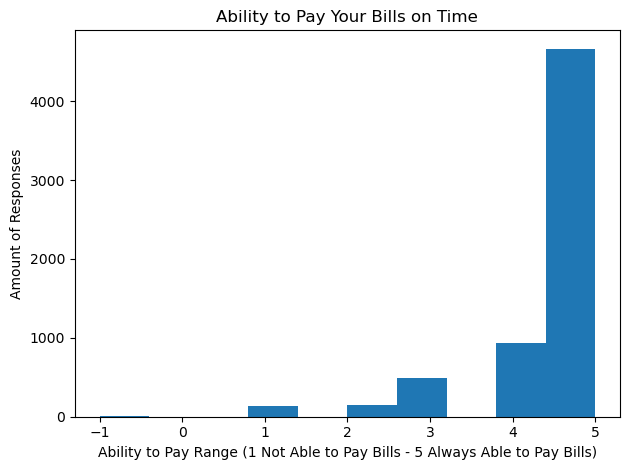

In [60]:
#Step 13: Question 2 Work: Kerek
#Question: Do students with high debt have trouble paying bills on time? 

#Look at BENEFITS_4 Tuition Reimbursement and/or Student Debt Repayment 
#Look at MANAGE1_1 Paid all your bills on time Survey item (modified) 

#Create a new dataframe with only those variables as columns.
student_data = cleaned_data[['BENEFITS_4','MANAGE1_1', 'FWBscore']]

student_df = pd.DataFrame(student_data)

#Rename the columns.
renamed_data = student_df.rename(columns={"BENEFITS_4" : "Repayment of Student Debt", "MANAGE1_1" : "Ability to Pay Your Bills on Time", "FWBscore" : "Financial Well-Being Score"})
renamed_data.head()

#Find the max answer for Repayment of Student Debt
max_debt_repayment = renamed_data['Repayment of Student Debt'].max()
print(max_debt_repayment)

#Find the min answer for Repayment of Student Debt
min_debt_repayment = renamed_data['Repayment of Student Debt'].min()
print(min_debt_repayment)

#Repayment of Student Debt meaning: -1: refused, 0: No, 1: Yes

#Find the max answer for Ability to Pay Your Bills on Time
max_ability_to_pay = renamed_data['Ability to Pay Your Bills on Time'].max()
print(max_ability_to_pay)

#Find the min answer for Ability to Pay Your Bills on Time
min_ability_to_pay = renamed_data['Ability to Pay Your Bills on Time'].min()
print(min_ability_to_pay)

#Ability to pay meaning: -1: refused, 1: Never, 
#2 : Seldom, 3: Sometimes, 4: Often, 5: Always.

#Financial Well-Being Score: the lower the number the worse the financial well-being is. 
#Find the max answer for Ability to Pay Your Bills on Time
max_FWBscore = renamed_data['Financial Well-Being Score'].max()
print(max_FWBscore)

#Find the min answer for Ability to Pay Your Bills on Time
min_FWBscore = renamed_data['Financial Well-Being Score'].min()
print(min_FWBscore)


"""Now that I know what the data means, I am going to take out the -1 values for each of the columns since that value is associated
with refusing to answer the question. 
"""

drop_minus_one = renamed_data[renamed_data != -1].dropna()
print(drop_minus_one.count())

"""Put the data in a histogram of the ability to pay bills column."""

#Create the histogram.

plt.hist(renamed_data['Ability to Pay Your Bills on Time'])

plt.title('Ability to Pay Your Bills on Time')
plt.xlabel('Ability to Pay Range (1 Not Able to Pay Bills - 5 Always Able to Pay Bills)')
plt.ylabel('Amount of Responses')
plt.tight_layout()

#Findings: The vast majority of people can pay their bills. 

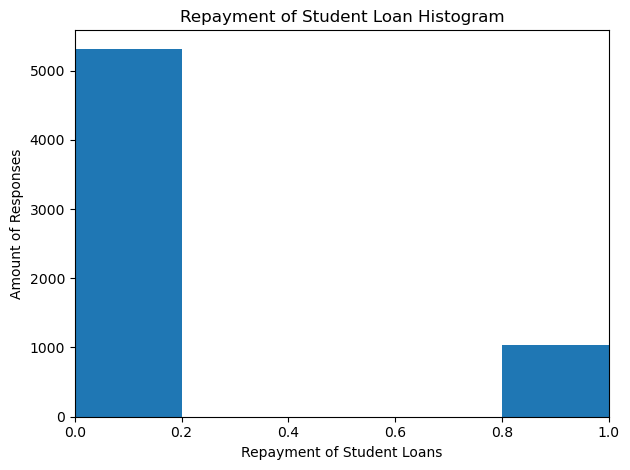

In [61]:
#Create the histogram.
plt.hist(renamed_data['Repayment of Student Debt'])

plt.xlim(0,1)

plt.title('Repayment of Student Loan Histogram')
plt.xlabel('Repayment of Student Loans')
plt.ylabel('Amount of Responses')
plt.tight_layout()

#The vast majority of people aren't paying their student debt off. This likely is because the people who took the survey
#don't have student debt. 

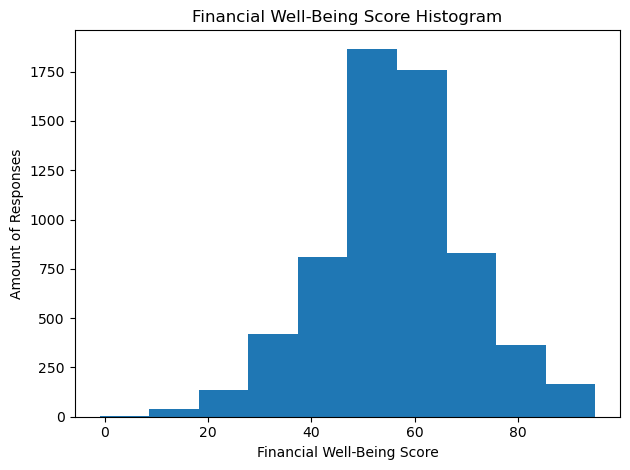

In [62]:
#Create a histogram for the Financial Well-Being Score
plt.hist(renamed_data['Financial Well-Being Score'])

plt.title('Financial Well-Being Score Histogram')
plt.xlabel('Financial Well-Being Score')
plt.ylabel('Amount of Responses')
plt.tight_layout()

#Findings: The financial well-being score has a curve that is slightly skewed to the right. This means that on average people 
#have a higher financial well-being score.

c:\Users\Maharrani Raisha\anaconda3\envs\dev\lib\site-packages\matplotlib\collections.py:996: RuntimeWarning: invalid value encountered in sqrt
  scale = np.sqrt(self._sizes) * dpi / 72.0 * self._factor


The correlation between the Financial Well-Being Score and the Ability to Pay Your Bills on Time is 0.42.


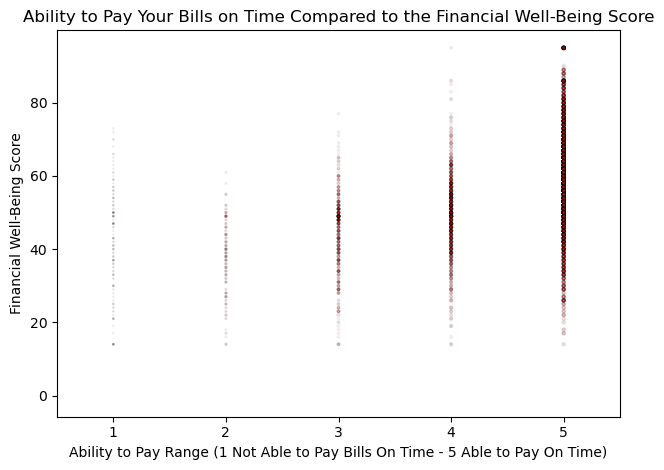

In [63]:
#Create a scatter plot comparing the financial well-being score and the ability to pay bills on time variable.
plt.scatter(renamed_data['Ability to Pay Your Bills on Time'], renamed_data['Financial Well-Being Score'], marker="o", facecolors="red", edgecolors="black",
            s=renamed_data['Ability to Pay Your Bills on Time'], alpha=0.05)

#Find the correlation.
correlation_FFWB = st.pearsonr(renamed_data['Ability to Pay Your Bills on Time'],renamed_data['Financial Well-Being Score'])
print(f'The correlation between the Financial Well-Being Score and the Ability to Pay Your Bills on Time is {round(correlation_FFWB[0],2)}.')

#Adding the x axis limit.
plt.xlim(0.5,5.5)

#Adding labels to the Graphic.
plt.title('Ability to Pay Your Bills on Time Compared to the Financial Well-Being Score')
plt.xlabel('Ability to Pay Range (1 Not Able to Pay Bills On Time - 5 Able to Pay On Time)')
plt.ylabel('Financial Well-Being Score')
plt.tight_layout()

<function matplotlib.pyplot.tight_layout(*, pad: 'float' = 1.08, h_pad: 'float | None' = None, w_pad: 'float | None' = None, rect: 'tuple[float, float, float, float] | None' = None) -> 'None'>

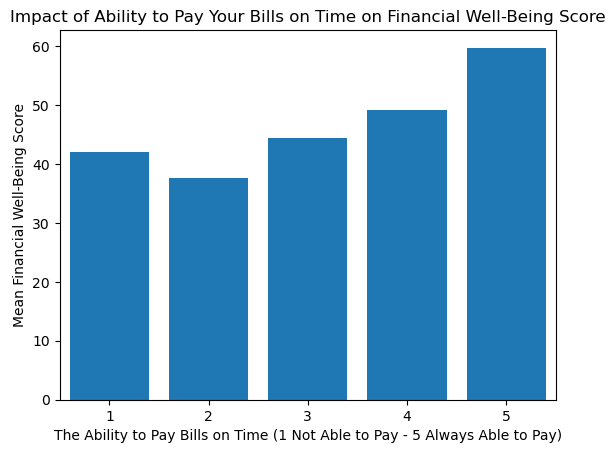

In [64]:
#Create the average FWBscore for each of the above responses. 
column = 'Ability to Pay Your Bills on Time'

#Set the x axis range to better show the data.
plt.xlim(0.5,5.5)

#Create a bar graph of the average FWBscore for each survey answer. 
grouped = renamed_data.groupby(column).mean()
plt.bar(grouped.index, grouped['Financial Well-Being Score'])
plt.xlabel("The Ability to Pay Bills on Time (1 Not Able to Pay - 5 Always Able to Pay)")
plt.ylabel('Mean Financial Well-Being Score')
plt.title('Impact of ' + column + ' on Financial Well-Being Score')
plt.tight_layout

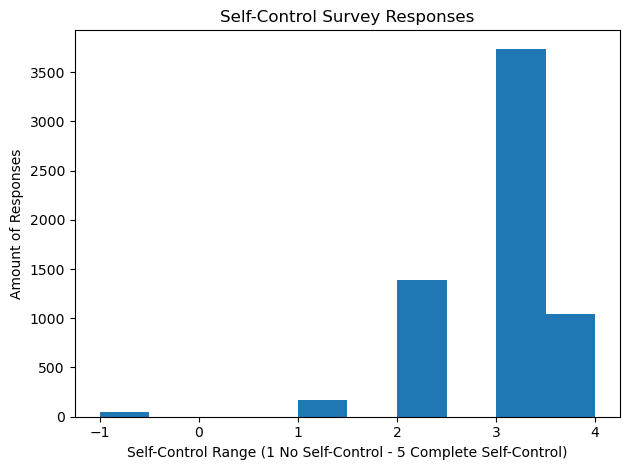

In [65]:
#Step 14: Question 3 Work: Kerek 
self_control_df = cleaned_data[['FWBscore', 'SELFCONTROL_2', 'FRUGALITY']]


#Rename columns
Q3_renamed_df = self_control_df.rename(columns={'SELFCONTROL_2' : 'Self-Control', 'FRUGALITY': 'Frugality', 'FWBscore' : 'Financial Well-Being Score' })

#Create a histogram of the Self Control and Frugality columns. 
#This variable is from 1 through 4. The question is "I am good at resisting temptation. 
#Here is what they mean: 1 = Not at all, 2 = Not very well, 3 = Very well,4 = Completely well

plt.hist(Q3_renamed_df['Self-Control'])

plt.title('Self-Control Survey Responses')
plt.xlabel('Self-Control Range (1 No Self-Control - 5 Complete Self-Control)')
plt.ylabel('Amount of Responses')
plt.tight_layout()

#Findings: There is a right skew to the histogram. This means that most people say they resist temptation
#very well and completely. 

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


<function matplotlib.pyplot.tight_layout(*, pad: 'float' = 1.08, h_pad: 'float | None' = None, w_pad: 'float | None' = None, rect: 'tuple[float, float, float, float] | None' = None) -> 'None'>

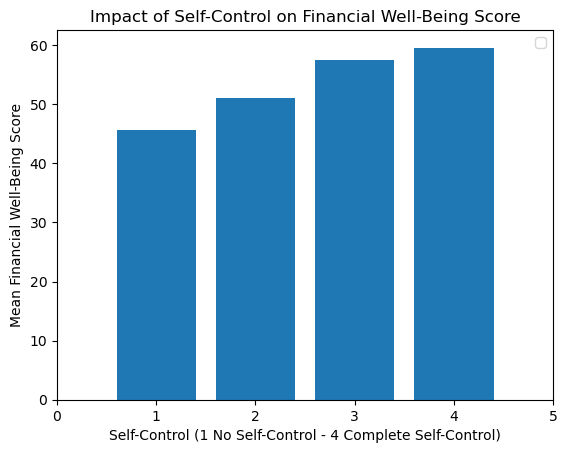

In [66]:
#Create the average FWBscore for each of the above responses. 
column = 'Self-Control'

#Set the x axis range to better show the data.
plt.xlim(0,5)

#Create a bar graph of the average FWBscore for each survey answer. 
grouped = Q3_renamed_df.groupby(column).mean()
plt.bar(grouped.index, grouped['Financial Well-Being Score'])
plt.xlabel("Self-Control (1 No Self-Control - 4 Complete Self-Control)")
plt.ylabel('Mean Financial Well-Being Score')
plt.title('Impact of ' + column + ' on Financial Well-Being Score')
plt.legend()
plt.tight_layout

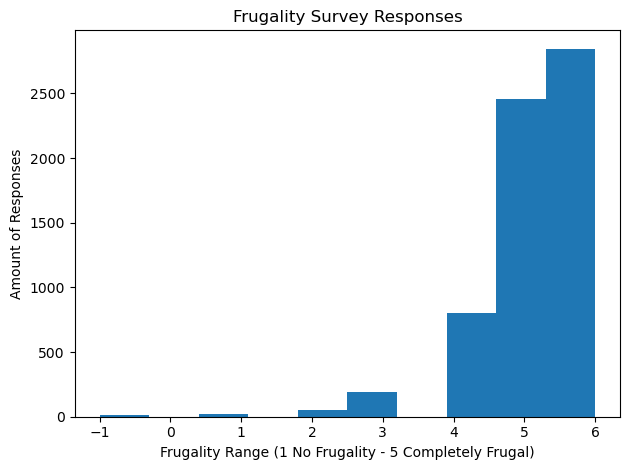

In [67]:
#Create a histogram for the Frugality variable. 
#The Frugality question is I can reuse an item I already have, there is no sense in buying somehting new. 
#The variable range is 1 through 6: 1 = Strongly Disagree, 2 = Disagree, 3 = Disagree slightly, 4 = Agree slightly
# 5 = Agree, 6 = Strongly Agree.

plt.hist(Q3_renamed_df['Frugality'])

#plt.xlim(0.1,6.1)

plt.title('Frugality Survey Responses')
plt.xlabel('Frugality Range (1 No Frugality - 5 Completely Frugal)')
plt.ylabel('Amount of Responses')
plt.tight_layout()

#Findings: Large right skew meaning that most people slightly agree to strongly agree and item 
#can be used more than once


The correlation between the Financial Well-Being Score and the Ability to Pay Your Bills on Time is 0.1.


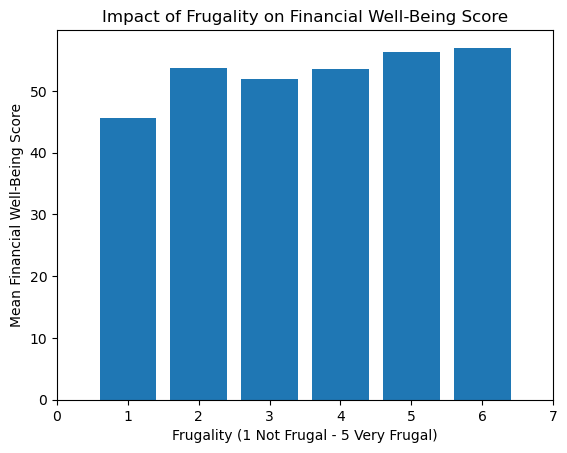

In [68]:
#Create the average FWBscore for each of the above responses. 
column = 'Frugality'

#Set the x axis range to better show the data.
plt.xlim(0,7)

#Create a bar graph of the average FWBscore for each survey answer. 
grouped = Q3_renamed_df.groupby(column).mean()
plt.bar(grouped.index, grouped['Financial Well-Being Score'])
plt.xlabel('Frugality (1 Not Frugal - 5 Very Frugal)')
plt.ylabel('Mean Financial Well-Being Score')
plt.title('Impact of ' + column + ' on Financial Well-Being Score')
plt.tight_layout

#Find the correlation.
correlation_FFWB = st.pearsonr(Q3_renamed_df['Frugality'],Q3_renamed_df['Financial Well-Being Score'])
print(f'The correlation between the Financial Well-Being Score and the Ability to Pay Your Bills on Time is {round(correlation_FFWB[0],2)}.')

The correlation between the Financial Well-Being Score and Frugality is 0.1.


c:\Users\Maharrani Raisha\anaconda3\envs\dev\lib\site-packages\matplotlib\collections.py:996: RuntimeWarning: invalid value encountered in sqrt
  scale = np.sqrt(self._sizes) * dpi / 72.0 * self._factor


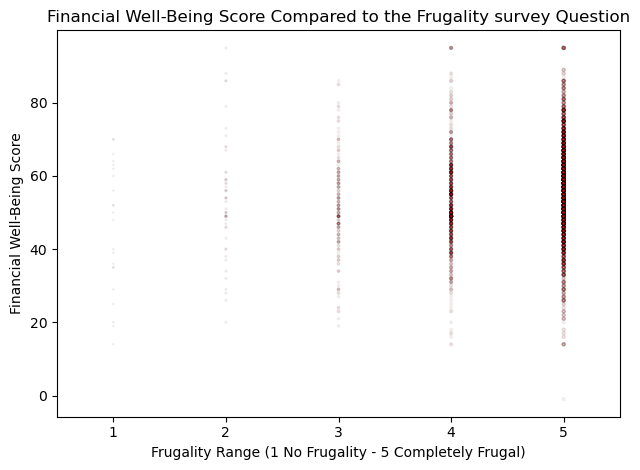

In [69]:
#Create a scatter plot for frugality compared to the financial well-being score. 
plt.scatter(Q3_renamed_df['Frugality'], Q3_renamed_df['Financial Well-Being Score'], marker="o", facecolors="red", edgecolors="black",
            s=Q3_renamed_df['Frugality'], alpha=0.05)

#Find the correlation.
correlation_FFWB = st.pearsonr(Q3_renamed_df['Frugality'],Q3_renamed_df['Financial Well-Being Score'])
print(f'The correlation between the Financial Well-Being Score and Frugality is {round(correlation_FFWB[0],2)}.')

#Adding an x axis limit.
plt.xlim(.5,5.5)

#Adding labels to the graphic. 
plt.title('Financial Well-Being Score Compared to the Frugality survey Question')
plt.xlabel('Frugality Range (1 No Frugality - 5 Completely Frugal)')
plt.ylabel('Financial Well-Being Score')
plt.tight_layout()

In [70]:
#Create a scatter plot for frugality compared to the financial well-being score. 
plt.scatter(Q3_renamed_df['Self Control'], Q3_renamed_df['Financial Well-Being Score'], marker="o", facecolors="red", edgecolors="black",
            s=Q3_renamed_df['Self Control'], alpha=0.05)

#Find the correlation.
correlation_SCFWB = st.pearsonr(Q3_renamed_df['Self Control'],Q3_renamed_df['Financial Well-Being Score'])
print(f'The correlation between the Financial Well-Being Score and Self Control is {round(correlation_SCFWB[0],2)}.')

#Set the x axis limit.
plt.xlim(0.5,4.5)

#Add labels to the graphic. 
plt.title('Financial Well-Being Score Compared to the Self Control survey Question')
plt.xlabel('Self Control Range (1 No Self Control - 5 Complete Self Control)')
plt.ylabel('Financial Well-Being Score')
plt.tight_layout()

KeyError: 'Self Control'

The correlation between Self Control and Frugality is 0.25.


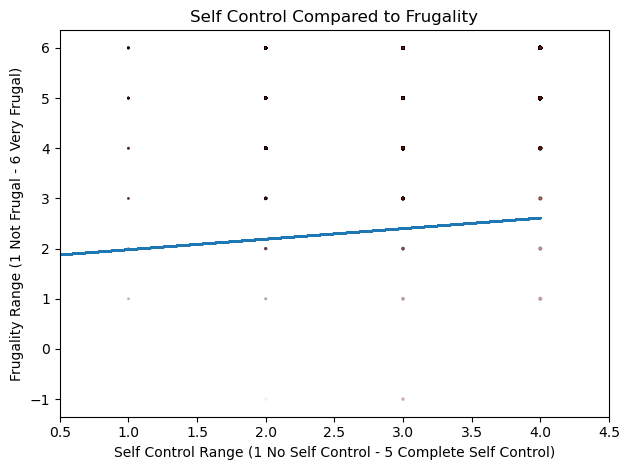

In [ ]:
#Compare the Self Control variable with the Frugality Variable. 
plt.scatter(Q3_renamed_df['Self Control'], Q3_renamed_df['Frugality'], marker="o", facecolors="red", edgecolors="black",
            s=Q3_renamed_df['Self Control'], alpha=0.05)


#Find the correlation.
correlation_SCF = st.pearsonr(Q3_renamed_df['Self Control'],Q3_renamed_df['Frugality'])
print(f'The correlation between Self Control and Frugality is {round(correlation_SCF[0],2)}.')

pe_slope, pe_int, pe_r, pe_p, pe_std_err = stats.linregress(Q3_renamed_df['Frugality'], Q3_renamed_df['Self Control'])
pe_fit = pe_slope * Q3_renamed_df['Self Control'] + pe_int
plt.plot(Q3_renamed_df['Self Control'],pe_fit,"--")

plt.xlim(.5,4.5)
plt.title('Self Control Compared to Frugality')
plt.xlabel('Self Control Range (1 No Self Control - 5 Complete Self Control)')
plt.ylabel('Frugality Range (1 Not Frugal - 6 Very Frugal)')
plt.tight_layout()


The correlation between the Financial Well-Being Score and the Financial Skill Score is 0.5.


/Users/eliaporter/anaconda3/envs/dev/lib/python3.10/site-packages/matplotlib/collections.py:996: RuntimeWarning: invalid value encountered in sqrt
  scale = np.sqrt(self._sizes) * dpi / 72.0 * self._factor


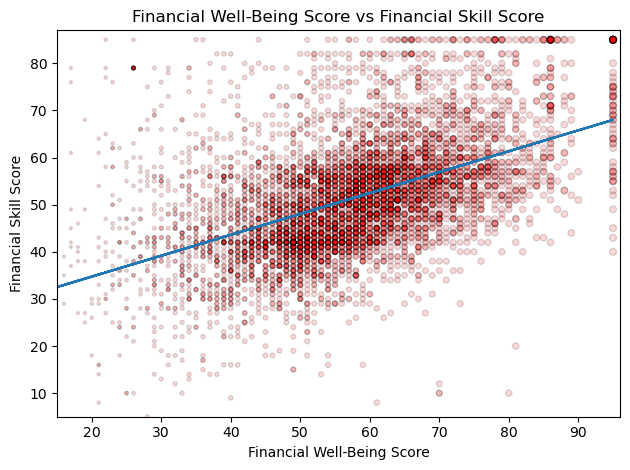

In [ ]:
#Question 4: Is there a correlation between the financial well-being score and the financial skill score?
#Compare the FWBscore to teh FSscore (Financial Skill Score).
score_vs_df = cleaned_data[['FWBscore', 'FSscore']]

skill_df = score_vs_df.rename(columns={'FWBscore' : 'Financial Well-Being Score', 'FSscore' : 'Financial Skill Score'})

plt.xlim(15,96)
plt.ylim(5,87)

plt.title('Financial Well-Being Score vs Financial Skill Score')
plt.xlabel('Financial Well-Being Score')
plt.ylabel('Financial Skill Score')

plt.scatter(skill_df['Financial Well-Being Score'], skill_df['Financial Skill Score'], marker=".", facecolors="red", edgecolors="black",
            s=skill_df['Financial Well-Being Score'], alpha=0.15)




pe_slope, pe_int, pe_r, pe_p, pe_std_err = stats.linregress(skill_df['Financial Well-Being Score'], skill_df['Financial Skill Score'])
pe_fit = pe_slope * skill_df['Financial Well-Being Score'] + pe_int
plt.plot(skill_df['Financial Well-Being Score'],pe_fit,"--")

plt.tight_layout()

#Find the correlation.
correlation = st.pearsonr(skill_df['Financial Well-Being Score'],skill_df['Financial Skill Score'])

correlation_cof = str(correlation)
print(f'The correlation between the Financial Well-Being Score and the Financial Skill Score is {round(correlation[0],2)}.')

#Findings: The there is a moderately positive correlation between the Financial Well-Being Score and the 
#Financial Skill Score.

The correlation between KHscore and FWBscore is: PearsonRResult(statistic=0.49521796191749495, pvalue=0.0)


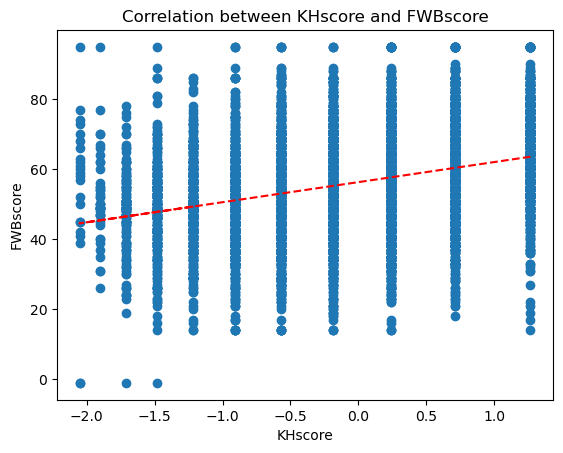

In [ ]:
#Step 15: Question 5 Work: Is there a corelation between the 
#"FWBscore" Financial well-being scale and
# "KHscore" Knoll and Houts financial knowledge scale score?
correlation_5 = cleaned_data['KHscore'].corr(cleaned_data['FWBscore'])
print("The correlation between KHscore and FWBscore is:", correlation)
# plotting a scatter plot with a trendline
plt.scatter(cleaned_data['KHscore'], cleaned_data['FWBscore'])
plt.xlabel('KHscore')
plt.ylabel('FWBscore')
plt.title('Correlation between KHscore and FWBscore')

# calculating the trendline
z = np.polyfit(cleaned_data['KHscore'], cleaned_data['FWBscore'], 1)
p = np.poly1d(z)
plt.plot(cleaned_data['KHscore'],p(cleaned_data['KHscore']),"r--")

plt.show()

               FWBscore
age_category           
18-24         50.806763
25-34         51.196237
35-44         52.665459
45-54         53.349767
55-61         55.707214
62-69         60.745348
70-74         62.445565
75+           63.559783


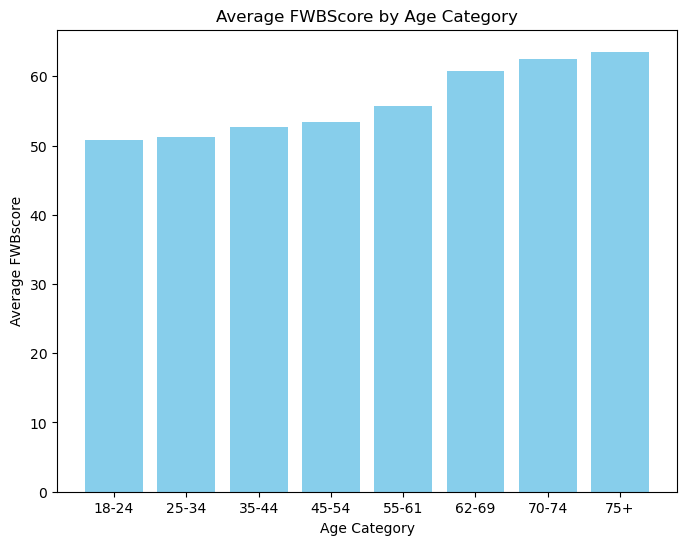

In [71]:
#Step1- Define the age categories
age_categories = {
    1: '18-24',
    2: '25-34',
    3: '35-44',
    4: '45-54',
    5: '55-61',
    6: '62-69',
    7: '70-74',
    8: '75+'
}

#Step 2 :Create a new column in the DataFrame that maps the age values to their corresponding categories:
cleaned_data['age_category'] = cleaned_data['agecat'].map(age_categories)

#Step 3 : calculate the average FWBscore for each age category using a pivot table:
age_category_scores = cleaned_data.pivot_table(values='FWBscore', index='age_category', aggfunc='mean')
print(age_category_scores)

#Step 4 : plot a histogram of the average FWBscore for each age category:
plt.figure(figsize=(8, 6))
plt.bar(age_category_scores.index, age_category_scores.values.ravel(), color='skyblue')
plt.xticks(rotation=0)
plt.xlabel('Age Category')
plt.ylabel('Average FWBscore')
plt.title('Average FWBScore by Age Category')
plt.show()

age_category
25-34    1116
45-54    1075
62-69    1021
35-44     828
75+       736
55-61     707
70-74     496
18-24     414
Name: count, dtype: int64


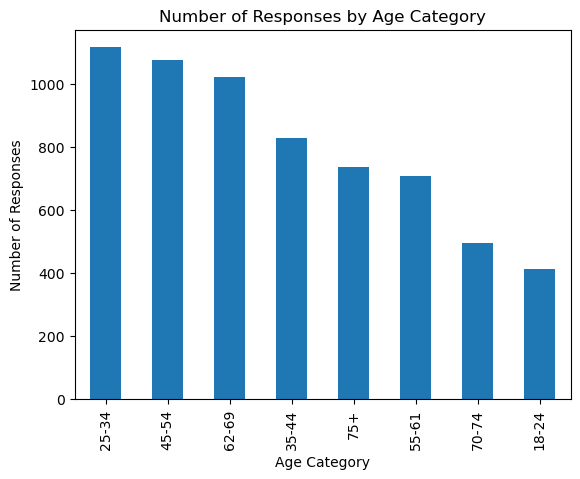

In [72]:
# How many survery responses were from each age categories?

cleaned_data['age_category'] = cleaned_data['agecat'].map(age_categories)

age_counts = cleaned_data['age_category'].value_counts()
print(age_counts)

#Plot the data
age_counts.plot(kind='bar')
plt.xlabel('Age Category')
plt.ylabel('Number of Responses')
plt.title('Number of Responses by Age Category')
plt.show()

            FWBscore
Region              
Midwest    55.910335
Northeast  55.304647
South      56.207004
West       56.495376


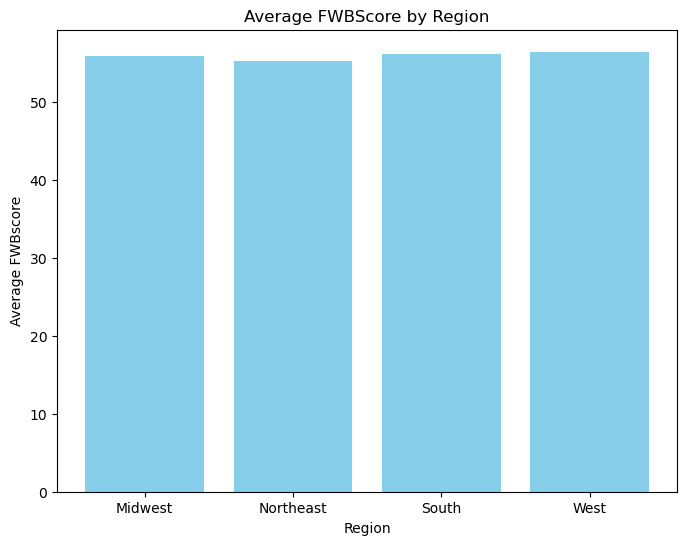

In [73]:
#Step1- Define the region categories
region_categories = {
    1: 'Northeast',
    2: 'Midwest',
    3: 'South',
    4: 'West',
}

#Step 2 :Create a new column in the DataFrame that maps the age values to their corresponding categories:
cleaned_data['Region'] = cleaned_data['PPREG4'].map(region_categories)

#Step 3 : calculate the average FWBscore for each age category using a pivot table:
regions_scores = cleaned_data.pivot_table(values='FWBscore', index='Region', aggfunc='mean')
print(regions_scores)

#Step 4 : plot a histogram of the average FWBscore for each age category:
plt.figure(figsize=(8, 6))
plt.bar(regions_scores.index, regions_scores.values.ravel(), color='skyblue')
plt.xticks(rotation=0)
plt.xlabel('Region')
plt.ylabel('Average FWBscore')
plt.title('Average FWBScore by Region')
plt.show()

Region
South        2256
West         1514
Midwest      1461
Northeast    1162
Name: count, dtype: int64


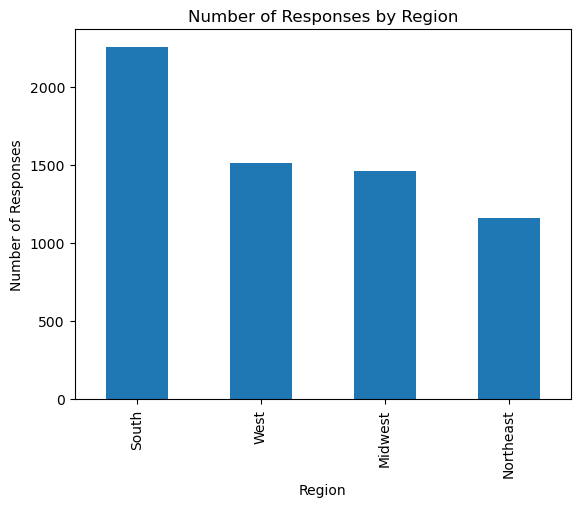

In [74]:
#How many survery responses were from each age categories
cleaned_data['Region'] = cleaned_data['PPREG4'].map(region_categories)

region_counts = cleaned_data['Region'].value_counts()
print(region_counts)

#Plot the data
region_counts.plot(kind='bar')
plt.xlabel('Region')
plt.ylabel('Number of Responses')
plt.title('Number of Responses by Region')
plt.show()

             FWBscore
Generation           
Boomer      58.051510
Gen X       52.874126
Millennial  51.126329
Pre-Boomer  63.123201


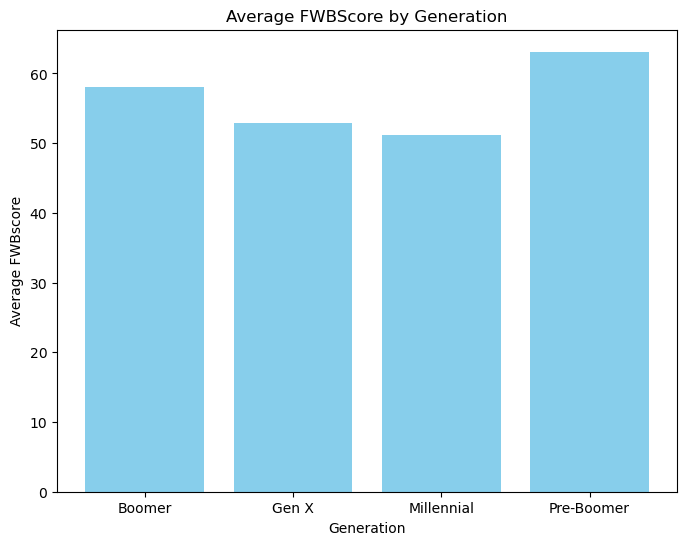

In [75]:
#Step1- Define the generation categories
generation_categories = {
    1: 'Pre-Boomer',
    2: 'Boomer',
    3: 'Gen X',
    4: 'Millennial',
}

#Step 2 :Create a new column in the DataFrame that maps the generation values to their corresponding categories:
cleaned_data['Generation'] = cleaned_data['generation'].map(generation_categories)

#Step 3 : calculate the average FWBscore for each generation category using a pivot table:
generation_scores = cleaned_data.pivot_table(values='FWBscore', index='Generation', aggfunc='mean')
print(generation_scores)

#Step 4 : plot a histogram of the average FWBscore for each generation category:
plt.figure(figsize=(8, 6))
plt.bar(generation_scores.index, generation_scores.values.ravel(), color='skyblue')
plt.xticks(rotation=0)
plt.xlabel('Generation')
plt.ylabel('Average FWBscore')
plt.title('Average FWBScore by Generation')
plt.show()

Generation
Boomer        1116
Millennial    1075
Gen X          828
Pre-Boomer     414
Name: count, dtype: int64


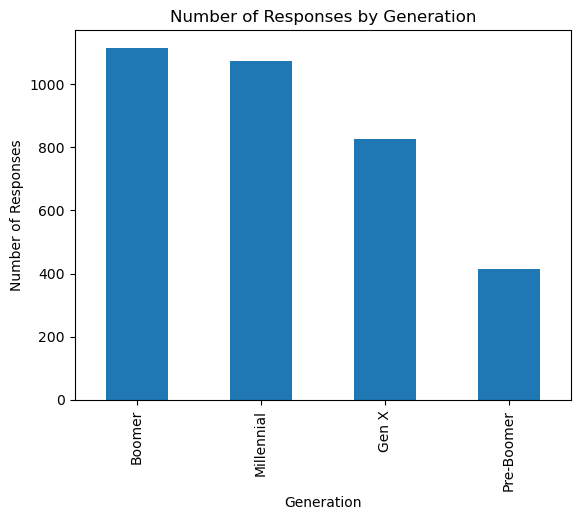

In [76]:
#How many survery responses were from each generation categories
cleaned_data['Generation'] = cleaned_data['agecat'].map(generation_categories)

generation_counts = cleaned_data['Generation'].value_counts()
print(generation_counts)

#Plot the data
generation_counts.plot(kind='bar')
plt.xlabel('Generation')
plt.ylabel('Number of Responses')
plt.title('Number of Responses by Generation')
plt.show()

            FWBscore
Kids                
Have kids  53.663873
No Kids    57.147550


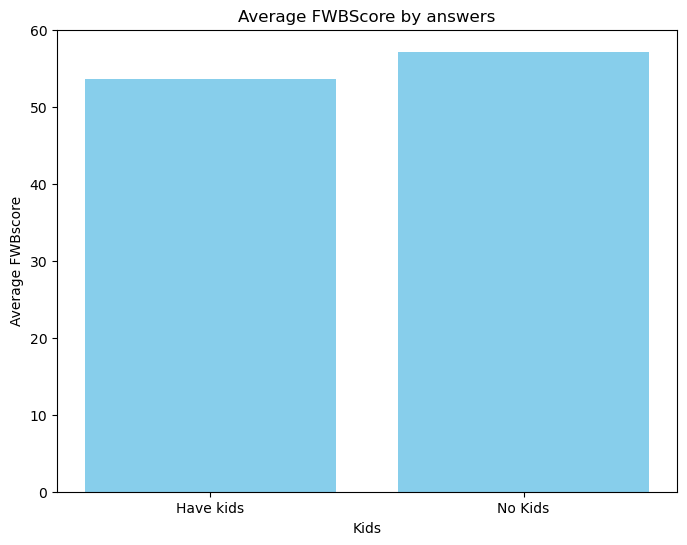

In [77]:
#Step1- Define the kids categories
kids_categories = {
    0: 'Have kids',
    1: 'No Kids',
}

#Step 2 :Create a new column in the DataFrame that maps the generation values to their corresponding categories:
cleaned_data['Kids'] = cleaned_data['KIDS_NoChildren'].map(kids_categories)

#Step 3 : calculate the average FWBscore for each generation category using a pivot table:
kids_scores = cleaned_data.pivot_table(values='FWBscore', index='Kids', aggfunc='mean')
print(kids_scores)

#Step 4 : plot a histogram of the average FWBscore for each generation category:
plt.figure(figsize=(8, 6))
plt.bar(kids_scores.index, kids_scores.values.ravel(), color='skyblue')
plt.xticks(rotation=0)
plt.xlabel('Kids')
plt.ylabel('Average FWBscore')
plt.title('Average FWBScore by answers')
plt.show()

In [78]:
# Is there a correlation between having kids/not having kids and the FWBscore

correlation = cleaned_data['KIDS_NoChildren'].corr(cleaned_data['FWBscore'])
print(f'The correlation between KIDS_NoChildren and FWBscore is: {correlation:.2f}')

The correlation between KIDS_NoChildren and FWBscore is: 0.05


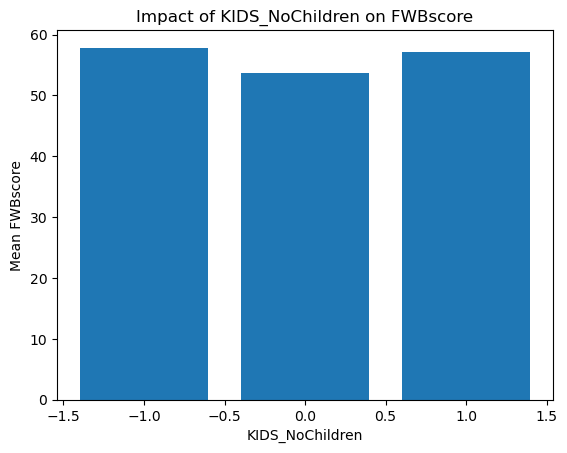

In [ ]:
#Step 16: Question 6 Work:Did the column KIDS_NoChildren, KIDS_1, KIDS_2 ,KIDS_3 , KIDS_4 
#have any impact on the FWBscore column. 
column = 'KIDS_NoChildren'
grouped = cleaned_data.groupby(column).mean()
plt.bar(grouped.index, grouped['FWBscore'])
plt.xlabel(column)
plt.ylabel('Mean FWBscore')
plt.title('Impact of ' + column + ' on FWBscore')
plt.show()

#Findings : There is a positive relationship between KIDS_NoChildren and FWBscore, 
#such that higher values of KIDS_NoChildren are associated with higher values of FWBscore.

,Financial Well-Being Score,KHscore,Lost Job,HH w/ Financial Difficulty,Foreclosure,Had a major car or home repair,Had a health emergency,Got a divorce or separation,Added a child to the household,Experienced the death of primary breadwinner,Received a large sum of money beyond normal income,Had a child start daycare or college,Provided unexpected financial support to a family member or friend,Respondent did not select any item in SHOCKS bank
Financial Well-Being Score,1.000000,0.330585,-0.171454,-0.204066,-0.073340,-0.087197,-0.107076,-0.080585,-0.053422,-0.021033,0.053573,-0.034525,-0.001031,0.182881
KHscore,0.330585,1.000000,-0.087342,-0.075281,-0.064088,0.075811,-0.010324,-0.056914,-0.037934,-0.053743,0.084352,-0.003960,0.033563,0.033608
Lost Job,-0.171454,-0.087342,1.000000,0.167514,0.076246,0.050592,0.062377,0.076014,0.051205,0.051817,0.033117,0.036354,0.010726,-0.259329
HH w/ Financial Difficulty,-0.204066,-0.075281,0.167514,1.000000,0.086776,0.098649,0.110340,0.049129,0.054009,0.036330,0.005473,0.035583,0.074870,-0.267402
Foreclosure,-0.073340,-0.064088,0.076246,0.086776,1.000000,0.022644,0.083677,0.114654,0.089648,0.114376,0.039961,0.071360,0.037069,-0.090063
Had a major car or home repair,-0.087197,0.075811,0.050592,0.098649,0.022644,1.000000,0.120762,0.027708,0.040421,0.023442,0.062449,0.085906,0.119054,-0.507314
Had a health emergency,-0.107076,-0.010324,0.062377,0.110340,0.083677,0.120762,1.000000,0.019291,0.024878,0.037145,0.027446,0.043444,0.092424,-0.402047
Got a divorce or separation,-0.080585,-0.056914,0.076014,0.049129,0.114654,0.027708,0.019291,1.000000,0.037604,0.055529,0.009853,0.065989,0.040679,-0.138718
Added a child to the household,-0.053422,-0.037934,0.051205,0.054009,0.089648,0.040421,0.024878,0.037604,1.000000,0.034256,0.039534,0.190738,0.020482,-0.185085
Experienced the death of primary breadwinner,-0.021033,-0.053743,0.051817,0.036330,0.114376,0.023442,0.037145,0.055529,0.034256,1.000000,0.025317,0.053214,0.026942,-0.099218


Correlation between Household with Difficulty & Financial Well-being Score -0.20406616799312643


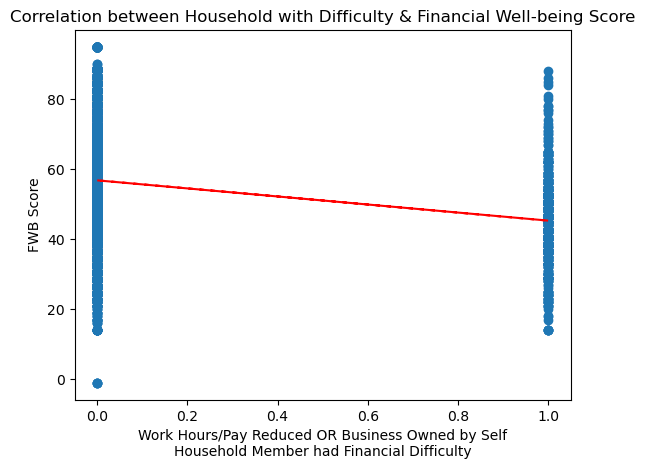

In [ ]:
#Step 17: Question 7 Work: Elia
##What are the major shocks in life that affect financial well-being?

#Create a new dataframe with only those variables as columns.
shock_data = cleaned_data[['FWBscore','KHscore','SHOCKS_1','SHOCKS_2','SHOCKS_3','SHOCKS_4','SHOCKS_5',
                           'SHOCKS_6','SHOCKS_7','SHOCKS_8','SHOCKS_9','SHOCKS_10','SHOCKS_11','SHOCKS_12']]
shock_data = shock_data.rename(columns={"FWBscore" : "Financial Well-Being Score","SHOCKS_1":"Lost Job",
                                        "SHOCKS_2" : "HH w/ Financial Difficulty","SHOCKS_3":"Foreclosure",
                                        "SHOCKS_4" : "Had a major car or home repair","SHOCKS_5":"Had a health emergency",
                                        "SHOCKS_6" : "Got a divorce or separation","SHOCKS_7":"Added a child to the household",
                                        "SHOCKS_8" : "Experienced the death of primary breadwinner","SHOCKS_9":"Received a large sum of money beyond normal income",
                                        "SHOCKS_10" : "Had a child start daycare or college","SHOCKS_11":"Provided unexpected financial support to a family member or friend",
                                        "SHOCKS_12" : "Respondent did not select any item in SHOCKS bank"})
display(shock_data.corr())

correlation_6 = cleaned_data['SHOCKS_2'].corr(cleaned_data['FWBscore'])
print("Correlation between Household with Difficulty & Financial Well-being Score", correlation_6)
# plotting a scatter plot with a trendline
plt.scatter(cleaned_data['SHOCKS_2'], cleaned_data['FWBscore'])
plt.xlabel('Work Hours/Pay Reduced OR Business Owned by Self\nHousehold Member had Financial Difficulty')
plt.ylabel('FWB Score')
plt.title('Correlation between Household with Difficulty & Financial Well-being Score')

# calculating the trendline
z = np.polyfit(cleaned_data['SHOCKS_2'], cleaned_data['FWBscore'], 1)
p = np.poly1d(z)
plt.plot(cleaned_data['SHOCKS_2'],p(cleaned_data['SHOCKS_2']),"r--")

plt.show()

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


Correlation between Gift Giving and FWB Score -0.20406616799312643


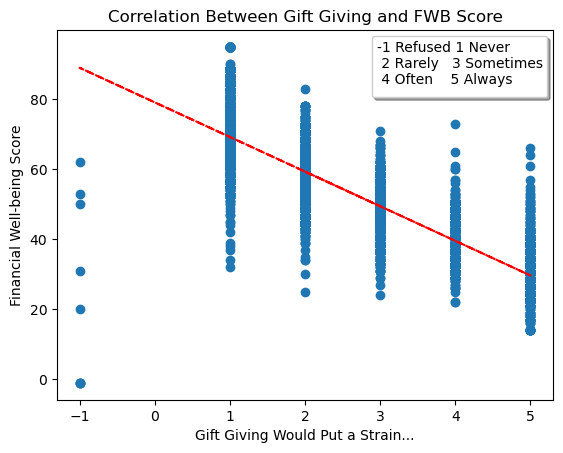

In [ ]:
#Step 18: Question 8 Work: Elia
#Would giving a gift put a strain on my finances for the month?

correlation_7 = cleaned_data['FWB2_1'].corr(cleaned_data['FWBscore'])
print("Correlation between Gift Giving and FWB Score", correlation_6)
# plotting a scatter plot with a trendline
plt.scatter(cleaned_data['FWB2_1'], cleaned_data['FWBscore'])
plt.xlabel('Gift Giving Would Put a Strain...')
plt.ylabel('Financial Well-being Score')
plt.title('Correlation Between Gift Giving and FWB Score')

# calculating the trendline
z = np.polyfit(cleaned_data['FWB2_1'], cleaned_data['FWBscore'], 1)
p = np.poly1d(z)
plt.plot(cleaned_data['FWB2_1'],p(cleaned_data['FWB2_1']),"r--")
plt.legend(loc='upper right', title='-1 Refused 1 Never\n 2 Rarely   3 Sometimes\n 4 Often    5 Always', shadow=True, fancybox=True, fontsize='small')

plt.show()

#Findings: 

In [ ]:
#Step 19: Question 9 Work: Determine the top 10 positive and negative correlations.
# Define the target variable
target = 'FWBscore'

num_top = 10
# Column descriptions, mapping codes to meaningful labels
column_descriptions = {
    'FWB1_1': 'Handle unexpected expense',
    'FWB1_2': 'Securing financial future',
    'FWB1_3': 'Never have the things I want in life',
    'FWB1_4': 'Enjoy life because of money management',
    'FWB1_5': 'Just getting by financially',
    'FWB1_6': 'Concerned money won’t last',
    'FWB2_1': 'Giving a gift would put strain on finances',
    'FWB2_2': 'Money left over at the end of the month',
    'FWB2_3': 'Behind with finances',
    'FWB2_4': 'Finances control my life',
    'FSscore': 'Financial skill scale score',
    'ACT1_1': 'Follow-through on financial commitments to others',
    'ACT1_2': 'Follow-through on personal financial goals',
    'SUBKNOWL1': 'Self-assessed financial knowledge',
    'MANAGE1_2': 'Stayed within budget',
    'MANAGE1_3': 'Paid off credit card balances in full',
    'SAVEHABIT': 'Saving is a habit',
    'FINKNOWL1': 'Understanding of compound interest',
    'FINKNOWL2': 'Understanding of inflation and return on savings',
    'FINKNOWL3': 'Understanding of stock vs mutual fund volatility',
    'ENDSMEET': 'Difficulty covering monthly expenses and bills',
    'MATHARDSHIP_1': 'Worried food would run out before getting money to buy more',
    'MATHARDSHIP_2': 'Food did not last, had no money to get more',
    'DISTRESS': 'Experiencing a lot of stress',
    'MATHARDSHIP_4': 'Household member could not afford to see a doctor or go to hospital',
    'GOALCONF': 'Confidence in ability to achieve financial goals',
    'FS1_7': 'Knows how to make oneself save'
}

# Calculate the correlations with the Financial Well-Being Score
correlations = cleaned_data.corrwith(cleaned_data[target])
desc_sorted_correlations = correlations.sort_values(ascending=False)
asc_sorted_correlations = correlations.sort_values()
# Exclude the target itself if present
desc_top_correlations = desc_sorted_correlations.head(num_top + 1).drop(labels=[target], errors='ignore')

# Replace index with meaningful names using the descriptions provided
meaningful_correlations = desc_top_correlations.rename(index=column_descriptions)
print("Top", num_top, "positive correlations:")
print(meaningful_correlations)
# Exclude the target itself if present
asc_sorted_correlations = asc_sorted_correlations.head(num_top + 1).drop(labels=[target], errors='ignore')

# Replace index with meaningful names using the descriptions provided
meaningful_correlations = asc_sorted_correlations.rename(index=column_descriptions)

# Display the top correlations
print("Top", num_top, "negative correlations:")
print(meaningful_correlations)

Top 10 positive correlations:
Money left over at the end of the month             0.724953
Handle unexpected expense                           0.701360
Enjoy life because of money management              0.678822
Securing financial future                           0.662299
Confidence in ability to achieve financial goals    0.542195
Paid off credit card balances in full               0.516427
Follow-through on personal financial goals          0.515344
Knows how to make oneself save                      0.500153
Financial skill scale score                         0.495218
Saving is a habit                                   0.493925
dtype: float64
Top 10 negative correlations:
Giving a gift would put strain on finances                            -0.823067
Never have the things I want in life                                  -0.774307
Finances control my life                                              -0.731991
Behind with finances                                                  -0.73